In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datasheet = pd.read_csv('applesOranges.csv')
print(datasheet)

     Unnamed: 0       x.1       x.2    y
0             0  0.150047  0.291506  0.0
1             1  0.264163  0.981083  0.0
2             2  0.901644  0.442521  0.0
3             3  1.072783  0.352745  0.0
4             4  0.811948  0.238954  0.0
..          ...       ...       ...  ...
195         195  0.523657 -0.011492  1.0
196         196  0.519403  0.748636  1.0
197         197  1.219962 -0.580537  1.0
198         198  0.207159  0.240464  1.0
199         199  1.158088 -1.185048  1.0

[200 rows x 4 columns]


def scatterplot(x1, x2, col):
    plt.scatter(x1, x2,c =col)
    plt.show()
scatterplot(datasheet['x.1'],datasheet['x.2'])    

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 're

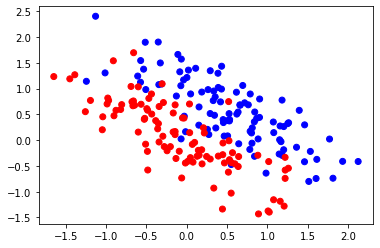

In [30]:
output_values = datasheet[['y']]
col = []
red = ['red']
blue = ['blue']
i = 0
for label, row in datasheet.iterrows() :
    if row['y'] == True :
        col = col + red
    else:
        col = col + blue

print (col)
def scatterplot(x1, x2, col):
    plt.scatter(x1, x2,c = col)
    plt.show()
scatterplot(datasheet[['x.1']],datasheet[['x.2']], col)    

In [50]:
w = np.array()
i = 0
for alpha in range(0,190,10):
    w[i] = [np.cos(alpha), np.sin()]
    i= i+1
print(w)    
    

TypeError: array() missing required argument 'object' (pos 1)